In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df=pd.read_csv("Cleaned_Dataset.csv")

In [6]:
df=df.drop(columns="Unnamed: 0")

In [20]:
#Summary Statistics
df.describe(include=[np.number])


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [29]:
import pandas as pd


crime_types = ['Assault', 'Murder', 'Rape']

for crime in crime_types:
    highest = df.loc[df[crime].idxmax(), 'Location']
    lowest = df.loc[df[crime].idxmin(), 'Location']
    print(f"Crime: {crime}")
    print(f"  Highest in: {highest} ({df[crime].max()})")
    print(f"  Lowest in: {lowest} ({df[crime].min()})\n")


Crime: Assault
  Highest in: North Carolina (337)
  Lowest in: North Dakota (45)

Crime: Murder
  Highest in: Georgia (17.4)
  Lowest in: North Dakota (0.8)

Crime: Rape
  Highest in: Nevada (46.0)
  Lowest in: North Dakota (7.3)



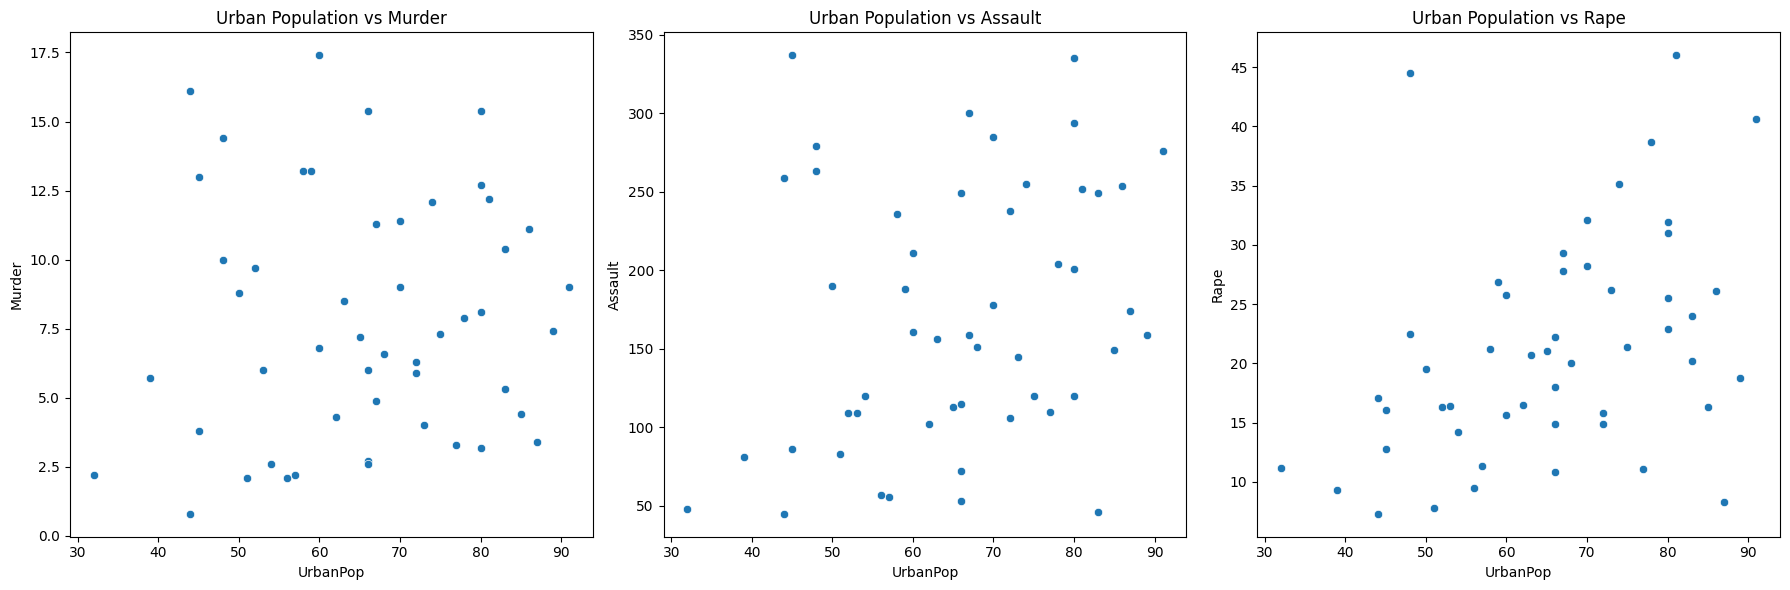

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
crime_types = ['Murder', 'Assault', 'Rape']

for i, crime in enumerate(crime_types):
    sns.scatterplot(data=df, x='UrbanPop', y=crime, ax=axes[i])
    axes[i].set_title(f'Urban Population vs {crime}')
    
plt.tight_layout()
plt.show()

C:\Users\sudhe\AppData\Local\Temp\ipykernel_26512\3024718246.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_crime_stats = df.groupby('Urban_Category')[['Murder', 'Assault', 'Rape']].mean()


<Figure size 1200x600 with 0 Axes>

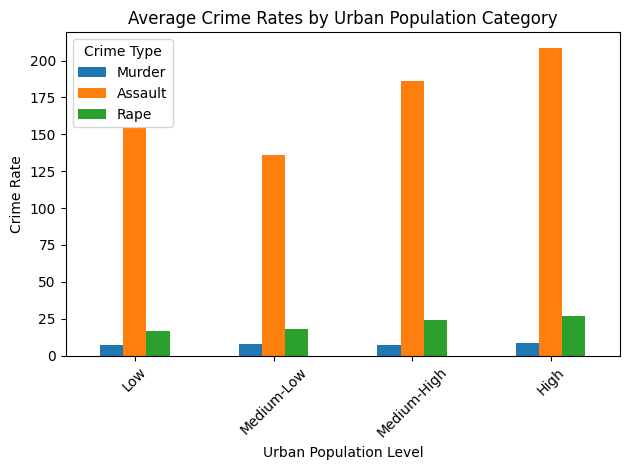

Average crime rates by urban population category:
                  Murder     Assault       Rape
Urban_Category                                 
Low             7.323077  154.538462  16.538462
Medium-Low      7.815385  136.076923  18.030769
Medium-High     7.463636  186.090909  23.809091
High            8.500000  208.692308  26.946154
Percentage increase from lowest to highest urban population:
Murder     16.07
Assault    35.04
Rape       62.93% increase


In [32]:
df['Urban_Category'] = pd.qcut(df['UrbanPop'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

urban_crime_stats = df.groupby('Urban_Category')[['Murder', 'Assault', 'Rape']].mean()

plt.figure(figsize=(12, 6))
urban_crime_stats.plot(kind='bar')
plt.title('Average Crime Rates by Urban Population Category')
plt.xlabel('Urban Population Level')
plt.ylabel('Crime Rate')
plt.legend(title='Crime Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\
Average crime rates by urban population category:")
print(urban_crime_stats)

pct_change = ((urban_crime_stats.loc['High'] - urban_crime_stats.loc['Low']) / urban_crime_stats.loc['Low'] * 100)
print("\
Percentage increase from lowest to highest urban population:")
print(pct_change.round(2).to_string() + "% increase")

C:\Users\sudhe\AppData\Local\Temp\ipykernel_26512\208161022.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Urban_Category')[['Murder', 'Assault', 'Rape']].mean().plot(kind='line', marker='o')


<Figure size 1000x600 with 0 Axes>

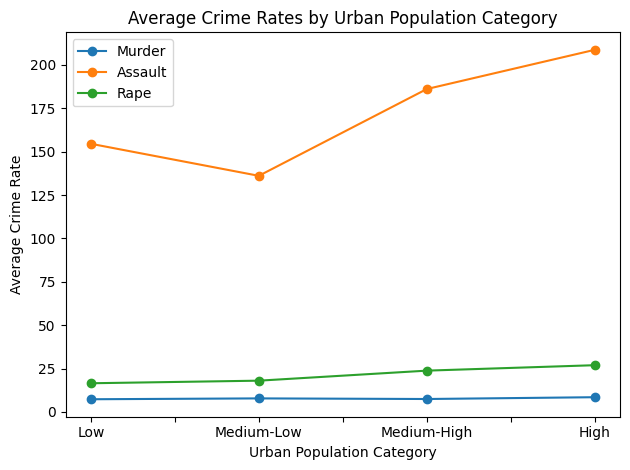

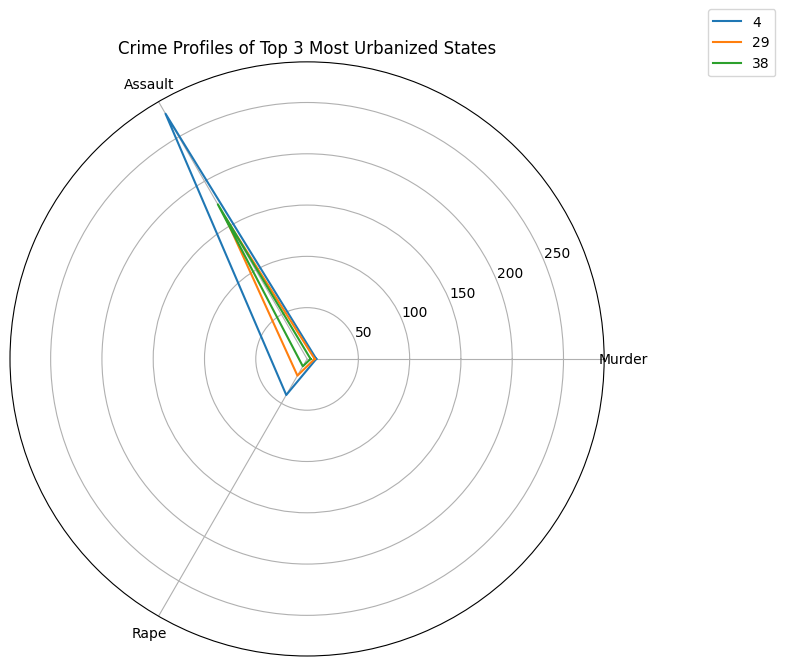

In [44]:
plt.figure(figsize=(10, 6))
df.groupby('Urban_Category')[['Murder', 'Assault', 'Rape']].mean().plot(kind='line', marker='o')
plt.title('Average Crime Rates by Urban Population Category')
plt.xlabel('Urban Population Category')
plt.ylabel('Average Crime Rate')
plt.tight_layout()
plt.show()

from math import pi
urban_top3 = df.sort_values('UrbanPop', ascending=False).head(3)
labels = ['Murder', 'Assault', 'Rape']
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]
plt.figure(figsize=(8, 8))
for idx, row in urban_top3.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    plt.polar(angles, values, label=row.name)
plt.xticks(angles[:-1], labels)
plt.title('Crime Profiles of Top 3 Most Urbanized States')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()



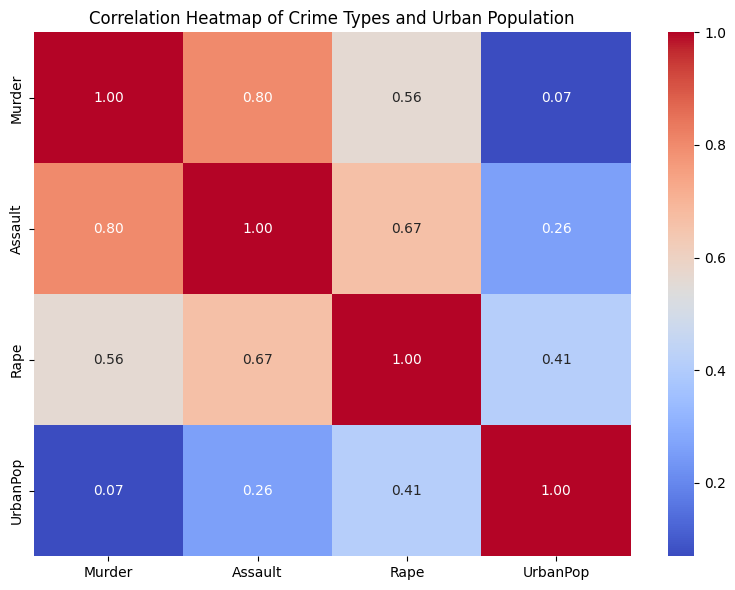

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Murder', 'Assault', 'Rape', 'UrbanPop']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Crime Types and Urban Population')
plt.tight_layout()
plt.show()